### 1. Датасет

https://www.kaggle.com/datasets/shivam2503/diamonds

Будет использоваться датасет цен на бриллианты

У бриллиантов есть следующие признаки:

**цена** в долларах США ($326--$18,823)

**вес** бриллианта в каратах (0,2--5,01)

**качество огранки** (Fair, Good, Very Good, Premium, Ideal)

**цвет** бриллианта, от J (худший) до D (лучший)

**чистота** - показатель прозрачности бриллианта (I1 (худший), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучший))

**x длина** в мм (0--10,74)

**y ширина** в мм (0--58,9)

**z глубина** в мм (0--31,8)

**глубина** -- общая глубина в процентах = z / среднее(x, y) = 2 * z / (x + y) (43--79)

**table** -- ширина вершины алмаза относительно самой широкой точки (43--95)


### 2. EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision % .4f

import warnings

warnings.filterwarnings('ignore')  # отключаем предупреждения

Считываем обучающую выборку.

In [2]:
df = pd.read_csv('../../data/diamond_price/diamonds.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Пропущенных значений нет

In [5]:
print(df.loc[(df['carat'] == 0) | (df['depth'] == 0) | (df['table'] == 0) | (df['price'] == 0) | (df['x'] == 0) | (
            df['y'] == 0) | (df['z'] == 0)])

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
2207         2208   1.00    Premium     G     SI2   59.1   59.0   3142  6.55   
2314         2315   1.01    Premium     H      I1   58.1   59.0   3167  6.66   
4791         4792   1.10    Premium     G     SI2   63.0   59.0   3696  6.50   
5471         5472   1.01    Premium     F     SI2   59.2   58.0   3837  6.50   
10167       10168   1.50       Good     G      I1   64.0   61.0   4731  7.15   
11182       11183   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00   
11963       11964   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00   
13601       13602   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88   
15951       15952   1.14       Fair     G     VS1   57.5   67.0   6381  0.00   
24394       24395   2.18    Premium     H     SI2   59.4   61.0  12631  8.49   
24520       24521   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00   
26123       26124   2.25    Premium     

Есть строки с нулевыми значениями x y или z, они будут удалены позже. Не будем использовать эти фичи для обучения, т.к. они значительно коррелируют с весом бриллианта(0.95)

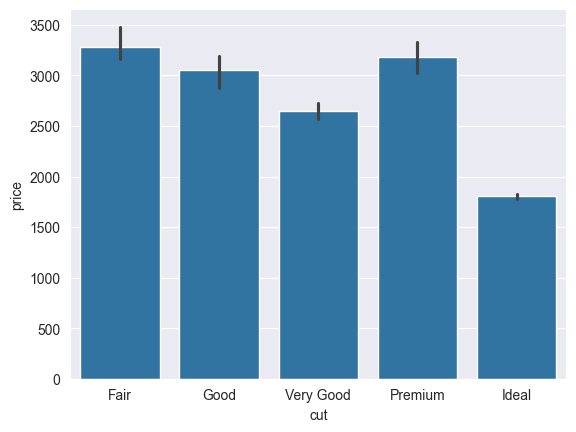

In [6]:
sns.barplot(x="cut", y="price", estimator='median', data=df, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']);

Цена бриллианта не зависит напрямую только от огранки. Попробуем построить другие графики

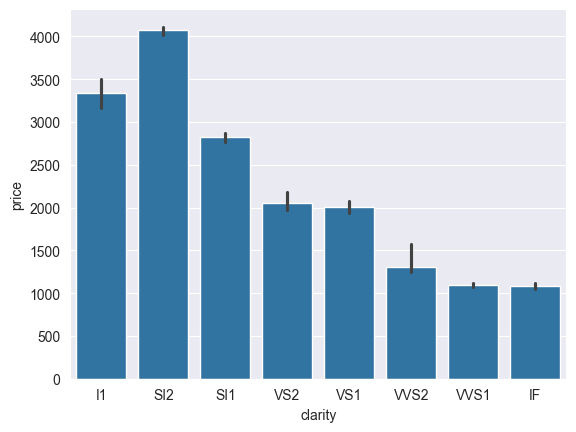

In [7]:
sns.barplot(x="clarity", y="price", estimator='median', data=df,
            order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']);


Неожиданно, но средняя цена бриллианта падает с увеличением качества. Значит нельзя учитывать только этот параметр. Построим другие графики.

<Axes: xlabel='carat', ylabel='price'>

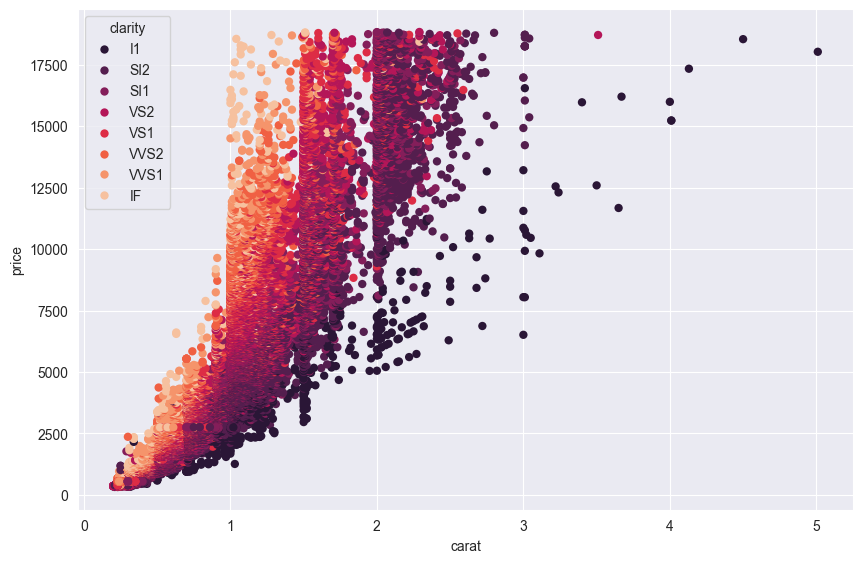

In [8]:
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
f, ax = plt.subplots(figsize=(10, 6.5))
sns.scatterplot(x="carat", y="price",
                hue="clarity",
                hue_order=clarity_ranking, linewidth=0,
                data=df, ax=ax, palette="rocket")

Видно, что цена сильно зависит от массы бриллианта, а бриллианты хорошего качества(IF) стоят дороже бриллиантов плохого качества при одинаковом весе.

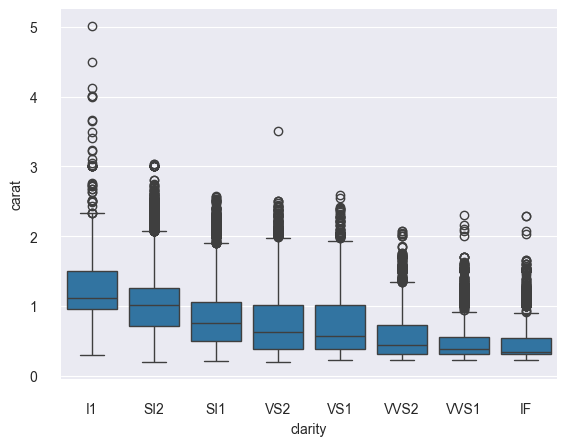

In [9]:
sns.boxplot(x="clarity", y="carat", order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],
            data=df)
sns.despine(offset=10, trim=True)

Здесь видно, что чем больше масса биллианта, тем в среднем ниже его качество. Поэтому медианная цена бриллиантов хорошего качества ниже чем медианная цена бриллиантов плохого качества, так как цена бриллианта очень сильно зависит именно от массы.

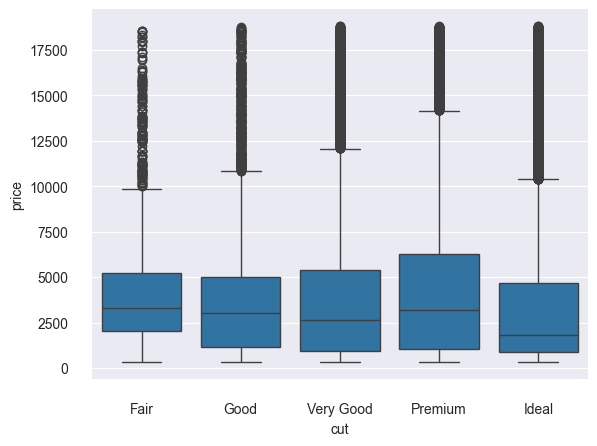

In [10]:
cut_ranking = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
sns.boxplot(x="cut", y="price", order=cut_ranking,
            data=df)
sns.despine(offset=10, trim=True)

Видно, что в зависимости от качества огранки растет максимальная цена (кроме идеальной огранки)

<Axes: xlabel='color', ylabel='count'>

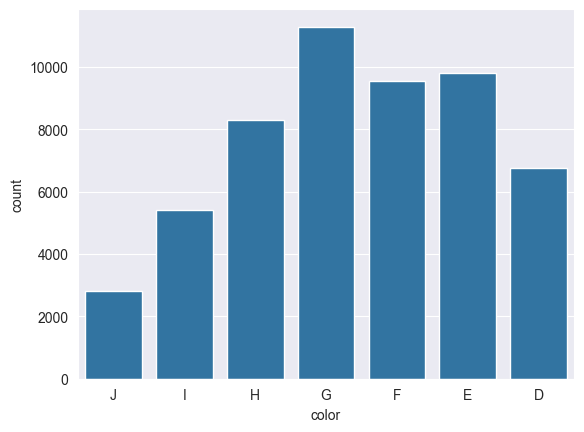

In [11]:
color_ranking = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
sns.countplot(data=df, x='color', order=color_ranking)

<Axes: xlabel='carat', ylabel='price'>

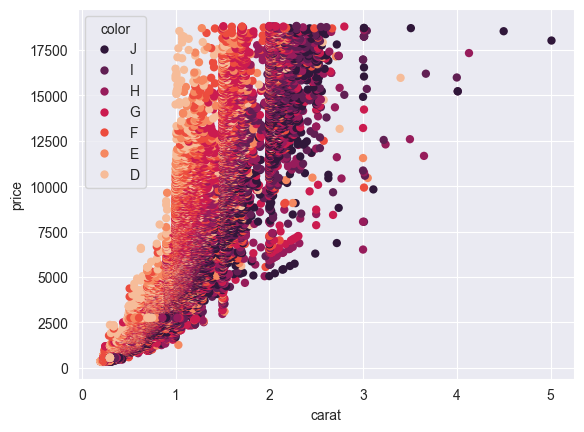

In [12]:

sns.scatterplot(x="carat", y="price",
                hue="color",
                hue_order=color_ranking, linewidth=0,
                data=df, palette="rocket")

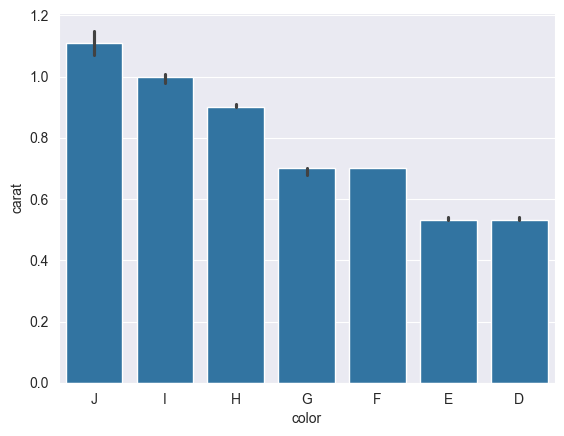

In [13]:
sns.barplot(x="color", y="carat", estimator='median', data=df, order=color_ranking);

Также по двум верхним графикам видно, что прозрачность бриллианта значительно влияет на цену и при одинаковой массе бесцветные бриллианты будут стоить дороже. Также цвет бриллианта коррелирует с его массой.

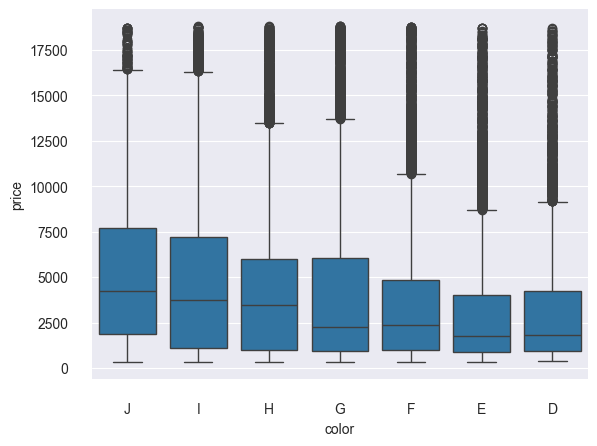

In [14]:
sns.boxplot(x="color", y="price", order=color_ranking,
            data=df)
sns.despine(offset=10, trim=True)

Можно заметить, что прозрачнее бриллиант(D), тем ниже его максимальная цена. Более прозрачные бриллианты обычно ценятся больше, поэтому можем заметить, что

Проверим другие признаки на корреляцию с ценой

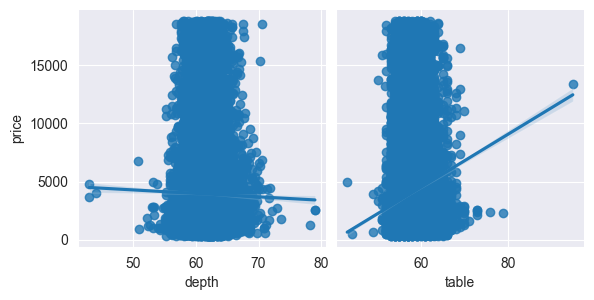

In [15]:
g = sns.pairplot(df, height=3, aspect=1, x_vars=['depth', 'table'], y_vars=['price'], kind='reg')

Есть некоторая зависимость цены от этих параметров, но с большими отклонениями

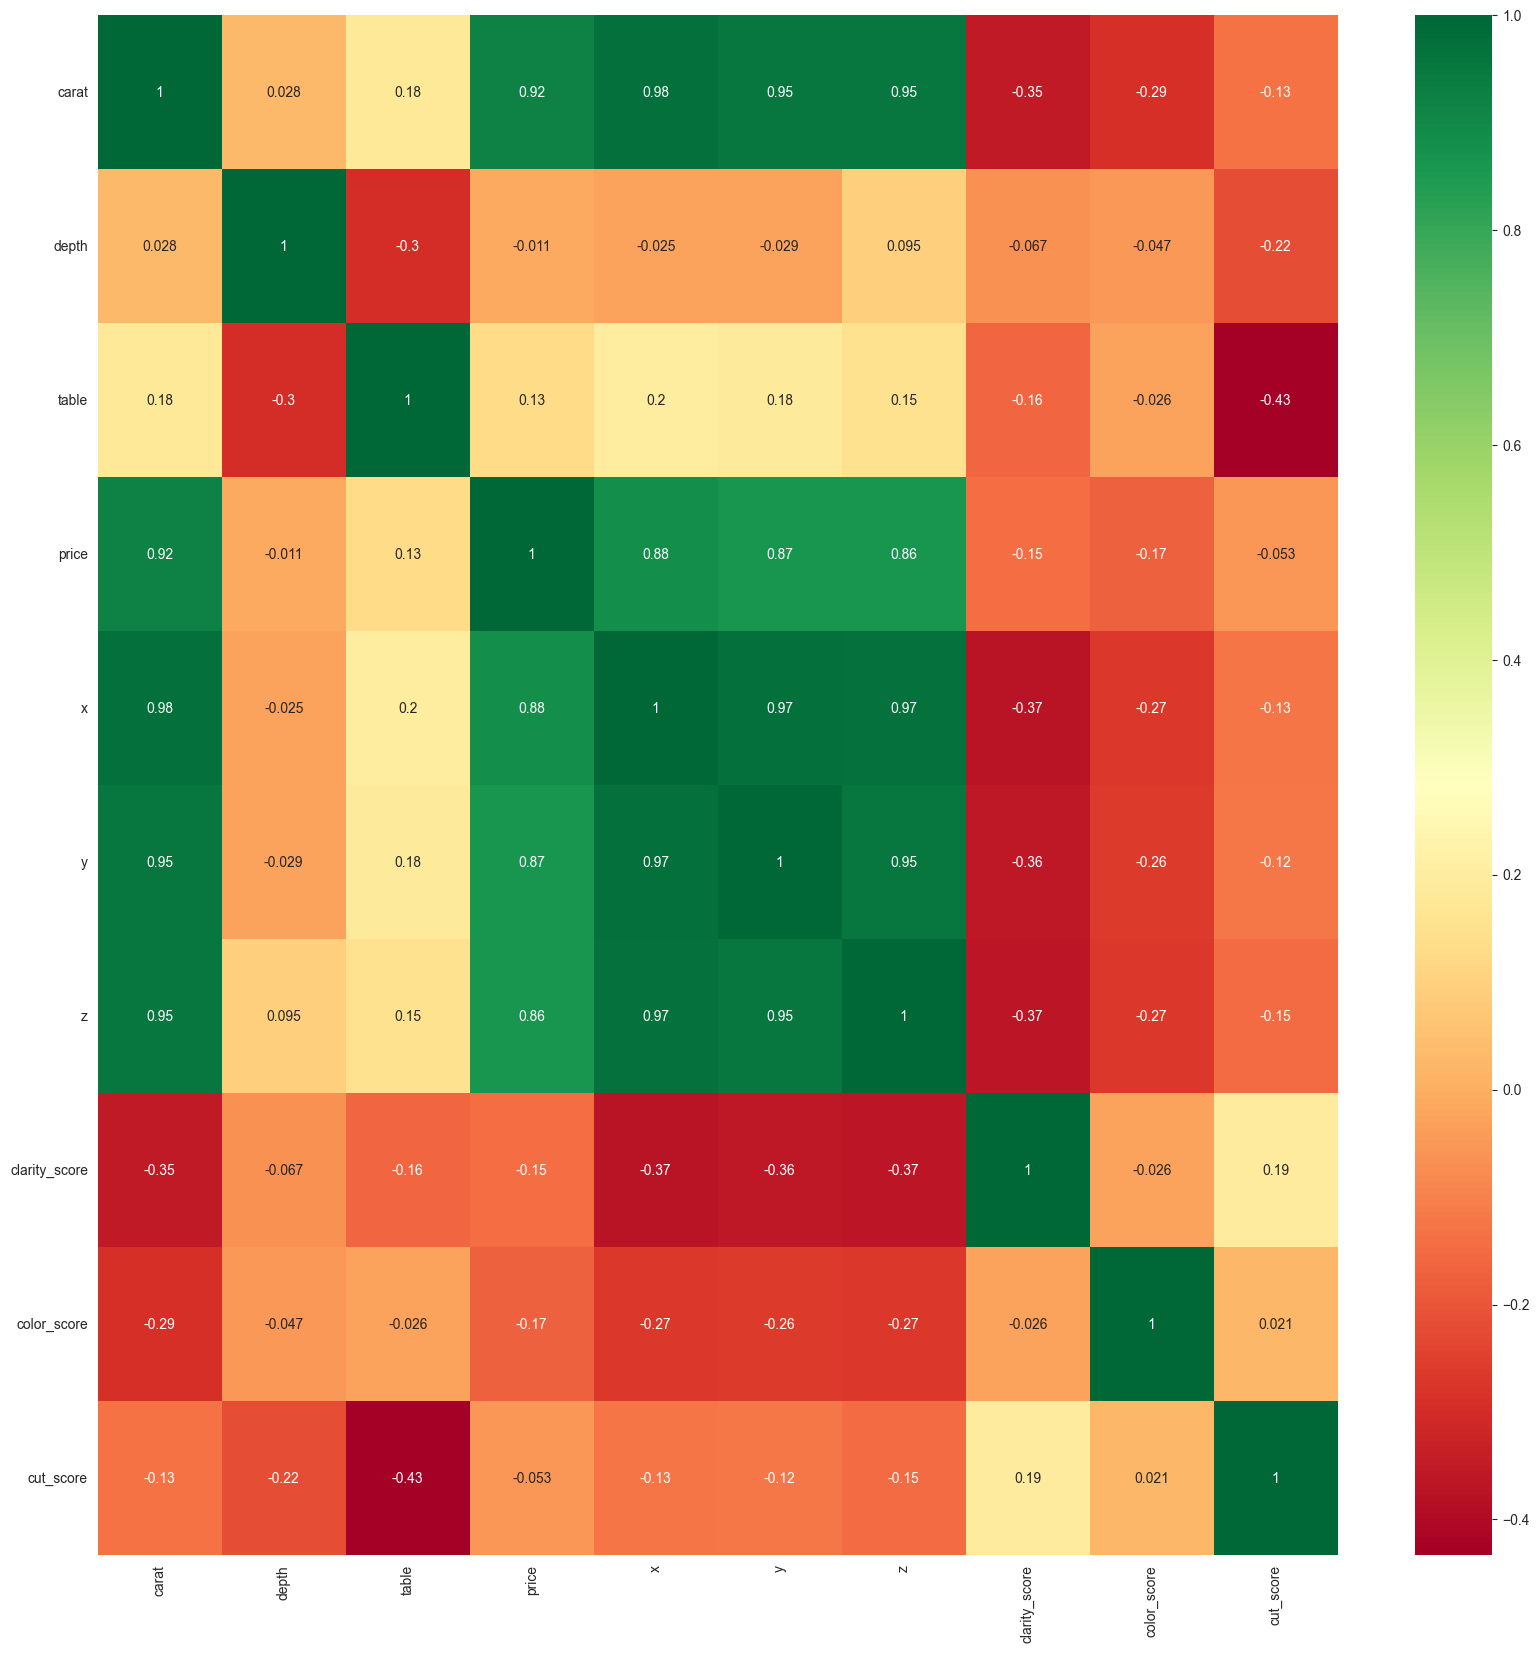

In [16]:
df = df.drop(labels='Unnamed: 0', axis=1)
heatmap_df = df.copy()
heatmap_df['clarity_score'] = df['clarity'].replace(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'],
                                                    [8, 7, 6, 5, 4, 3, 2, 1])
heatmap_df['color_score'] = df['color'].replace(['D', 'E', 'F', 'G', 'H', 'I', 'J'], [7, 6, 5, 4, 3, 2, 1])
heatmap_df['cut_score'] = df['cut'].replace(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], [5, 4, 3, 2, 1])

heatmap_df = heatmap_df.drop(['clarity', 'cut', 'color'], axis=1)

sns.heatmap(heatmap_df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.show()

In [17]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df[['clarity', 'cut', 'color']]).toarray())
enc_df.columns = enc.get_feature_names_out(['clarity', 'cut', 'color'])

df = df.drop(['clarity', 'cut', 'color', 'x', 'y', 'z'], axis=1)

df = df.join(enc_df)

df.head()

,carat,depth,table,price,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,...,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,326,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.31,63.3,58.0,335,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Заменил категориальные значения с помощью OneHotEncoder.

Удалили размеры бриллиантов, как лишние признаки, т.к. они почти полностью коррелируют с весом и ценой бриллианта. Если их оставить точность предсказания упадет.

### 3. Подготовим выборку(в частности для небольших тестов)

In [58]:
from sklearn.model_selection import train_test_split

y = df["price"]
X = df.drop(columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 4. Реализация Bagging и AdaBoost

##### 4.1 Bagging

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

class MyBaggingRegression():
    def __init__(
            self,
            estimator=DecisionTreeRegressor(),
            n_estimators=10,
            random_state: int = 0
    ):
        self.estimator = estimator
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.estimators = []

    def fit(self, X, y):
        self.estimators = []
        np.random.seed(self.random_state)
        samples = np.array([np.random.choice(X.index, size=len(X), replace=True) for _ in range(self.n_estimators)])
        for sample in samples:
            X_train, y_train = X.loc[sample], y.loc[sample]
            new_est = self.estimator.fit(X_train, y_train)
            self.estimators.append(new_est)

    def predict(self, X):
        res = np.array([est.predict(X) for est in self.estimators])
        return res.mean(axis=0)

    def get_params(self,deep=False):
        return {
            'estimator': self.estimator,
            'n_estimators': self.n_estimators,
            'random_state': self.random_state
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self







In [20]:
# Небольшой тест

my = MyBaggingRegression(estimator=DecisionTreeRegressor(max_depth=3), n_estimators=594, random_state=1)
my.fit(X_train, y_train)
y_pr = my.predict(X_test)

print("Test default R2 =", r2_score(y_test, y_pr))

Test default R2 = 0.8698779001245636


##### 4.2 AdaBoost

In [21]:
from sklearn.base import clone


class MyAdaBoostRegression():
    def __init__(self,
                 estimator=DecisionTreeRegressor(),
                 n_estimators=10,
                 random_state: int = 0
                 ):
        self.estimator = estimator
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.estimators = []
        self.estimator_weights_ = np.zeros(self.n_estimators, dtype=np.float64)
        self.estimator_errors_ = np.ones(self.n_estimators, dtype=np.float64)

    def fit(self, X, y):
        self.estimators = []
        self.estimator_weights_ = np.zeros(self.n_estimators, dtype=np.float64)
        self.estimator_errors_ = np.ones(self.n_estimators, dtype=np.float64)
        sample_w = np.ones(X.shape[0], dtype=np.float64)
        sample_w /= X.shape[0]
        np.random.seed(self.random_state)

        for i in range(self.n_estimators):
            estimator = clone(self.estimator)
            idx = np.random.choice(X.index, size=len(X), p=sample_w, replace=True)
            X_, y_ = X.loc[idx], y.loc[idx]
            estimator.fit(X_, y_)
            pred = estimator.predict(X)
            error_v = np.abs(pred - y)
            error_max = error_v.max()
            error_v /= error_max
            # calculate square error
            error_v **=2
            estimator_error = (sample_w * error_v).sum()
            if estimator_error >= 0.5:
                break
            b_conf=estimator_error/(1-estimator_error)
            estimator_w= np.log(1.0/b_conf)
            self.estimator_weights_[i] = estimator_w
            self.estimator_errors_[i]=estimator_error
            self.estimators.append(estimator)
            if not i == (self.n_estimators - 1):
                # count and normalize new weights
                sample_w *= np.power(b_conf, np.log(1-estimator_error))
                sample_w /= sample_w.sum()
    def predict(self, X):
        predictions = np.array([est.predict(X) for est in self.estimators]).T
        sorted = np.argsort(predictions, axis=1)
        cumsum = np.cumsum(self.estimator_weights_[sorted], axis=1)
        median = cumsum >= 0.5 * cumsum[:, -1][:,np.newaxis]
        m_index = median.argmax(axis=1)
        m_est=sorted[np.arange(X.shape[0]), m_index]

        return predictions[np.arange(X.shape[0]), m_est]
        
        
    def get_params(self,deep=False):
        return {
            'estimator': self.estimator,
            'n_estimators': self.n_estimators,
            'random_state': self.random_state
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [22]:
my = MyAdaBoostRegression(estimator=LinearRegression(), n_estimators=5, random_state=1)
my.fit(X_train, y_train)
y_pr = my.predict(X_test)

print("Test default R2 =", r2_score(y_test, y_pr))

Test default R2 = 0.9160698063084859


### 5. Обучение и сравнение с использованием фреймворка Optuna и кросс валидации.

In [67]:
stats = pd.DataFrame(
    columns=['ensemble', 'model', 'R2', 'MSE',
             'training_time'])

In [56]:
import optuna
from datetime import datetime
from sklearn.model_selection import  cross_val_score, StratifiedKFold
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor


def objective(trial, X, y, model):
    rf_params = {
        "n_estimators": trial.suggest_categorical("n_estimators", choices=[20, 80, 160, 320, 450]),
        "estimator": trial.suggest_categorical(
            "estimator", choices=["3DecisionTreeRegressor", "5DecisionTreeRegressor","10DecisionTreeRegressor"]
        ),
        "random_state": 1121218}

    if rf_params["estimator"] == "3DecisionTreeRegressor":
        estimator = DecisionTreeRegressor(max_depth=3)
    elif rf_params["estimator"] == "5DecisionTreeRegressor":
        estimator = DecisionTreeRegressor(max_depth=5)
    else:
        estimator = DecisionTreeRegressor(max_depth=10)

    rf_params.pop("estimator")
    reg = model(estimator=estimator, **rf_params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=rf_params["random_state"])
    cross_val = cross_val_score(reg, X, y, scoring="r2", cv=cv, n_jobs=-1)

    return cross_val.mean()

def print_stat(study):
    print("Best trial:")
    trial = study.best_trial
        
    print("R2 score: {}".format(trial.value))
    print("Params: ")
    for key, value in trial.params.items():
        print("  {} : {}".format(key, value))
        
def run_test():
    func = lambda trial : objective(trial)
    study = optuna.create_study(direction="maximize", sampler=optuna.samplers.BruteForceSampler())
    study.optimize(func)
    print_stat(study)


##### 5.1 MyBagging

In [25]:
%%time
def myBaggingTest(trial):
    return objective(trial, X, y, MyBaggingRegression)
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.BruteForceSampler())
study.optimize(myBaggingTest)

print("Best trial:")
trial = study.best_trial

print("R2 score: {}".format(trial.value))
print("Params: ")
for key, value in trial.params.items():
    print("  {} : {}".format(key, value))

[I 2024-03-31 07:03:46,817] A new study created in memory with name: no-name-e5466dad-19e5-414e-a3db-89408fbca6e9
[I 2024-03-31 07:04:10,117] Trial 0 finished with value: 0.8703469454733195 and parameters: {'n_estimators': 450, 'estimator': '3DecisionTreeRegressor'}. Best is trial 0 with value: 0.8703469454733195.
[I 2024-03-31 07:04:16,845] Trial 1 finished with value: 0.9118537234764984 and parameters: {'n_estimators': 80, 'estimator': '5DecisionTreeRegressor'}. Best is trial 1 with value: 0.9118537234764984.
[I 2024-03-31 07:05:12,957] Trial 2 finished with value: 0.964481652496886 and parameters: {'n_estimators': 450, 'estimator': '10DecisionTreeRegressor'}. Best is trial 2 with value: 0.964481652496886.
[I 2024-03-31 07:05:24,472] Trial 3 finished with value: 0.9650689344388249 and parameters: {'n_estimators': 80, 'estimator': '10DecisionTreeRegressor'}. Best is trial 3 with value: 0.9650689344388249.
[I 2024-03-31 07:05:36,788] Trial 4 finished with value: 0.9111343675011103 and 

Best trial:
R2 score: 0.9650689344388249
Params: 
  n_estimators : 80
  estimator : 10DecisionTreeRegressor
CPU times: total: 2.02 s
Wall time: 4min 55s


In [68]:
res = {'ensemble': 'My bagging'}

start_time = datetime.now()
my = MyBaggingRegression(estimator=DecisionTreeRegressor(max_depth=10), n_estimators=20, random_state=1121218)
my.fit(X_train, y_train)
end_time = datetime.now()
res['model'] = "10 DecisionTree"
res['training_time'] = (end_time - start_time).microseconds
y_pred = my.predict(X_test)
res['R2'] = r2_score(y_test, y_pred)
res['MSE'] = mean_squared_error(y_test, y_pred)
stats = pd.concat([stats, pd.DataFrame(res, index=[0])])
stats

,ensemble,model,R2,MSE,training_time
0,My bagging,10 DecisionTree,0.96372,565829.324138,426548


##### 5.2 My AdaBoost

In [27]:
%%time
def myAdaBoostTest(trial):
    return objective(trial, X, y, MyAdaBoostRegression)
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.BruteForceSampler())
study.optimize(myBaggingTest)

print_stat(study)

[I 2024-03-31 07:08:44,591] A new study created in memory with name: no-name-9da12666-44c4-46e3-9674-4ed587032490
[I 2024-03-31 07:09:15,339] Trial 0 finished with value: 0.9112333611223461 and parameters: {'n_estimators': 320, 'estimator': '5DecisionTreeRegressor'}. Best is trial 0 with value: 0.9112333611223461.
[I 2024-03-31 07:10:13,654] Trial 1 finished with value: 0.964481652496886 and parameters: {'n_estimators': 450, 'estimator': '10DecisionTreeRegressor'}. Best is trial 1 with value: 0.964481652496886.
[I 2024-03-31 07:10:24,474] Trial 2 finished with value: 0.9650689344388249 and parameters: {'n_estimators': 80, 'estimator': '10DecisionTreeRegressor'}. Best is trial 2 with value: 0.9650689344388249.
[I 2024-03-31 07:10:35,240] Trial 3 finished with value: 0.8709384076517029 and parameters: {'n_estimators': 160, 'estimator': '3DecisionTreeRegressor'}. Best is trial 2 with value: 0.9650689344388249.
[I 2024-03-31 07:11:18,012] Trial 4 finished with value: 0.9645302950342203 and

Best trial:
R2 score: 0.9650689344388249
Params: 
  n_estimators : 80
  estimator : 10DecisionTreeRegressor
CPU times: total: 1.86 s
Wall time: 4min 53s


In [69]:
res = {'ensemble': 'My AdaBoost'}

start_time = datetime.now()
my = MyAdaBoostRegression(estimator=DecisionTreeRegressor(max_depth=10), n_estimators=20, random_state=1121218)
my.fit(X_train, y_train)
end_time = datetime.now()
res['model'] = "10 DecisionTree"
res['training_time'] = (end_time - start_time).microseconds
y_pred = my.predict(X_test)
res['R2'] = r2_score(y_test, y_pred)
res['MSE'] = mean_squared_error(y_test, y_pred)
stats = pd.concat([stats, pd.DataFrame(res, index=[0])])
stats

,ensemble,model,R2,MSE,training_time
0,My bagging,10 DecisionTree,0.963720,565829.324138,426548
0,My AdaBoost,10 DecisionTree,0.968709,488006.772887,599901


##### 5.3 sklearn Bagging

In [59]:
%%time
def sklBaggingTest(trial):
    return objective(trial, X, y, BaggingRegressor)
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.BruteForceSampler())
study.optimize(sklBaggingTest)

print_stat(study)


[I 2024-03-31 14:05:22,831] A new study created in memory with name: no-name-7eadddd0-6559-46d7-bff0-013d2fbea791
[I 2024-03-31 14:05:35,116] Trial 0 finished with value: 0.9710921620092547 and parameters: {'n_estimators': 160, 'estimator': '10DecisionTreeRegressor'}. Best is trial 0 with value: 0.9710921620092547.
[I 2024-03-31 14:05:43,085] Trial 1 finished with value: 0.9166685369263664 and parameters: {'n_estimators': 160, 'estimator': '5DecisionTreeRegressor'}. Best is trial 0 with value: 0.9710921620092547.
[I 2024-03-31 14:05:55,827] Trial 2 finished with value: 0.9166540568383272 and parameters: {'n_estimators': 320, 'estimator': '5DecisionTreeRegressor'}. Best is trial 0 with value: 0.9710921620092547.
[I 2024-03-31 14:05:56,794] Trial 3 finished with value: 0.8725734156360268 and parameters: {'n_estimators': 20, 'estimator': '3DecisionTreeRegressor'}. Best is trial 0 with value: 0.9710921620092547.
[I 2024-03-31 14:06:18,916] Trial 4 finished with value: 0.9710882217711203 an

Best trial:
R2 score: 0.97112027415142
Params: 
  n_estimators : 80
  estimator : 10DecisionTreeRegressor
CPU times: total: 1.66 s
Wall time: 2min 23s


In [70]:


res = {'ensemble': 'sklearn bagging'}

start_time = datetime.now()
my = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=10), n_estimators=80, random_state=1121218)
my.fit(X_train, y_train)
end_time = datetime.now()
res['model'] = "10 DecisionTree"
res['training_time'] = (end_time - start_time).microseconds
y_pred = my.predict(X_test)
res['R2'] = r2_score(y_test, y_pred)
res['MSE'] = mean_squared_error(y_test, y_pred)
stats = pd.concat([stats, pd.DataFrame(res, index=[0])])
stats

,ensemble,model,R2,MSE,training_time
0,My bagging,10 DecisionTree,0.963720,565829.324138,426548
0,My AdaBoost,10 DecisionTree,0.968709,488006.772887,599901
0,sklearn bagging,10 DecisionTree,0.971390,446193.219742,514313


##### 5.4 sklearn AdaBoost

In [60]:
%%time
def sklAdaBoostTest(trial):
    return objective(trial, X, y, AdaBoostRegressor)
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.BruteForceSampler())
study.optimize(sklAdaBoostTest)

print_stat(study)


[I 2024-03-31 14:07:46,755] A new study created in memory with name: no-name-2fe4114c-4062-440a-81cb-336b6d28ea97
[I 2024-03-31 14:08:19,644] Trial 0 finished with value: 0.9164256537344203 and parameters: {'n_estimators': 450, 'estimator': '5DecisionTreeRegressor'}. Best is trial 0 with value: 0.9164256537344203.
[I 2024-03-31 14:08:38,669] Trial 1 finished with value: 0.8053638956547445 and parameters: {'n_estimators': 450, 'estimator': '3DecisionTreeRegressor'}. Best is trial 0 with value: 0.9164256537344203.
[I 2024-03-31 14:08:50,427] Trial 2 finished with value: 0.9234850789002745 and parameters: {'n_estimators': 160, 'estimator': '5DecisionTreeRegressor'}. Best is trial 2 with value: 0.9234850789002745.
[I 2024-03-31 14:09:04,934] Trial 3 finished with value: 0.8086436105638317 and parameters: {'n_estimators': 320, 'estimator': '3DecisionTreeRegressor'}. Best is trial 2 with value: 0.9234850789002745.
[I 2024-03-31 14:09:19,941] Trial 4 finished with value: 0.9671428768036645 an

Best trial:
R2 score: 0.9762598706137983
Params: 
  n_estimators : 20
  estimator : 10DecisionTreeRegressor
CPU times: total: 2.88 s
Wall time: 3min 59s


In [71]:

res = {'ensemble': 'sklearn AdaBoost'}

start_time = datetime.now()
my = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10), n_estimators=20, random_state=1121218)
my.fit(X_train, y_train)
end_time = datetime.now()
res['model'] = "10 DecisionTree"
res['training_time'] = (end_time - start_time).microseconds
y_pred = my.predict(X_test)
res['R2'] = r2_score(y_test, y_pred)
res['MSE'] = mean_squared_error(y_test, y_pred)
stats = pd.concat([stats, pd.DataFrame(res, index=[0])])
stats

,ensemble,model,R2,MSE,training_time
0,My bagging,10 DecisionTree,0.963720,565829.324138,426548
0,My AdaBoost,10 DecisionTree,0.968709,488006.772887,599901
0,sklearn bagging,10 DecisionTree,0.971390,446193.219742,514313
0,sklearn AdaBoost,10 DecisionTree,0.976650,364165.658372,364455


##### 5.5 Random Forest Regressor 

In [33]:
from sklearn.ensemble import RandomForestRegressor

def objective(trial):
    rf_params = {
        "n_estimators": trial.suggest_categorical("n_estimators", choices=[20, 80, 160, 320]),
        "max_depth": trial.suggest_categorical(
            "max_depth", choices=[3, 5, 10]
        ),
        'criterion': trial.suggest_categorical( 'criterion', choices=["squared_error", "friedman_mse", "poisson"]),
        "random_state": 1121218,
        
    }
    reg = RandomForestRegressor(**rf_params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=rf_params["random_state"])
    cross_val = cross_val_score(reg, X, y, scoring="r2", cv=cv, n_jobs=-1)
    return cross_val.mean()


In [34]:
%%time

run_test()

[I 2024-03-31 07:14:07,663] A new study created in memory with name: no-name-6b688e98-0039-42a1-bcde-a447ef6f1a12
[I 2024-03-31 07:14:16,389] Trial 0 finished with value: 0.8729330655767603 and parameters: {'n_estimators': 320, 'max_depth': 3, 'criterion': 'friedman_mse'}. Best is trial 0 with value: 0.8729330655767603.
[I 2024-03-31 07:14:27,591] Trial 1 finished with value: 0.8624194550601889 and parameters: {'n_estimators': 320, 'max_depth': 3, 'criterion': 'poisson'}. Best is trial 0 with value: 0.8729330655767603.
[I 2024-03-31 07:14:40,570] Trial 2 finished with value: 0.9710914080146683 and parameters: {'n_estimators': 160, 'max_depth': 10, 'criterion': 'squared_error'}. Best is trial 2 with value: 0.9710914080146683.
[I 2024-03-31 07:14:57,410] Trial 3 finished with value: 0.9091309903035126 and parameters: {'n_estimators': 320, 'max_depth': 5, 'criterion': 'poisson'}. Best is trial 2 with value: 0.9710914080146683.
[I 2024-03-31 07:15:14,706] Trial 4 finished with value: 0.967

Best trial:
R2 score: 0.9711312707809452
Params: 
  n_estimators : 80
  max_depth : 10
  criterion : friedman_mse
CPU times: total: 4.42 s
Wall time: 4min 7s


In [72]:
res = {'ensemble': 'sklearn Random Forest'}

start_time = datetime.now()
my = RandomForestRegressor(max_depth=10, n_estimators=80, random_state=1121218)
my.fit(X_train, y_train)
end_time = datetime.now()
res['model'] = "depth 10"
res['training_time'] = (end_time - start_time).microseconds
y_pred = my.predict(X_test)
res['R2'] = r2_score(y_test, y_pred)
res['MSE'] = mean_squared_error(y_test, y_pred)
stats = pd.concat([stats, pd.DataFrame(res, index=[0])])
stats

,ensemble,model,R2,MSE,training_time
0,My bagging,10 DecisionTree,0.963720,565829.324138,426548
0,My AdaBoost,10 DecisionTree,0.968709,488006.772887,599901
0,sklearn bagging,10 DecisionTree,0.971390,446193.219742,514313
0,sklearn AdaBoost,10 DecisionTree,0.976650,364165.658372,364455
0,sklearn Random Forest,depth 10,0.971385,446279.259178,856863


##### 5.6 Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

def objective(trial):
    rf_params = {
        "n_estimators": trial.suggest_categorical("n_estimators", choices=[20, 80, 160, 320]),
        "max_depth": trial.suggest_categorical(
            "max_depth", choices=[3, 5, 10]
        ),
        'criterion': trial.suggest_categorical( 'criterion', choices=["squared_error", "friedman_mse"]),
        'loss': trial.suggest_categorical( 'loss', choices=["huber", "squared_error"]),
        "random_state": 1121218,
        
    }
    reg = GradientBoostingRegressor(**rf_params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=rf_params["random_state"])
    cross_val = cross_val_score(reg, X, y, scoring="r2", cv=cv, n_jobs=-1)
    return cross_val.mean()

In [37]:
%%time

run_test()


[I 2024-03-31 07:18:29,553] A new study created in memory with name: no-name-5a414520-c3f9-4fd6-ad88-41dd335d8796
[I 2024-03-31 07:19:30,263] Trial 0 finished with value: 0.9812978474170585 and parameters: {'n_estimators': 320, 'max_depth': 10, 'criterion': 'friedman_mse', 'loss': 'huber'}. Best is trial 0 with value: 0.9812978474170585.
[I 2024-03-31 07:19:32,388] Trial 1 finished with value: 0.9637837342932439 and parameters: {'n_estimators': 20, 'max_depth': 10, 'criterion': 'friedman_mse', 'loss': 'squared_error'}. Best is trial 0 with value: 0.9812978474170585.
[I 2024-03-31 07:19:52,701] Trial 2 finished with value: 0.9814609440785063 and parameters: {'n_estimators': 320, 'max_depth': 5, 'criterion': 'squared_error', 'loss': 'huber'}. Best is trial 2 with value: 0.9814609440785063.
[I 2024-03-31 07:20:12,460] Trial 3 finished with value: 0.9814584737805341 and parameters: {'n_estimators': 320, 'max_depth': 5, 'criterion': 'friedman_mse', 'loss': 'huber'}. Best is trial 2 with val

Best trial:
R2 score: 0.9820564440164221
Params: 
  n_estimators : 80
  max_depth : 10
  criterion : squared_error
  loss : squared_error
CPU times: total: 6.88 s
Wall time: 9min 14s


In [73]:
res = {'ensemble': 'sklearn Gradient Boosting'}

start_time = datetime.now()
my = GradientBoostingRegressor(max_depth=10, n_estimators=80, random_state=1121218, criterion="squared_error", loss="squared_error")
my.fit(X_train, y_train)
end_time = datetime.now()
res['model'] = "depth 10 squared_error"
res['training_time'] = (end_time - start_time).microseconds
y_pred = my.predict(X_test)
res['R2'] = r2_score(y_test, y_pred)
res['MSE'] = mean_squared_error(y_test, y_pred)
stats = pd.concat([stats, pd.DataFrame(res, index=[0])])
stats

,ensemble,model,R2,MSE,training_time
0,My bagging,10 DecisionTree,0.963720,565829.324138,426548
0,My AdaBoost,10 DecisionTree,0.968709,488006.772887,599901
0,sklearn bagging,10 DecisionTree,0.971390,446193.219742,514313
0,sklearn AdaBoost,10 DecisionTree,0.976650,364165.658372,364455
0,sklearn Random Forest,depth 10,0.971385,446279.259178,856863
0,sklearn Gradient Boosting,depth 10 squared_error,0.981244,292512.334018,162593


##### 5.7 Histogram Gradient Boosting

In [39]:
from sklearn.ensemble import HistGradientBoostingRegressor


def objective(trial):
    rf_params = {
        "learning_rate": trial.suggest_categorical("learning_rate", choices=[0.5, 0.1, 0.2]),
        "max_leaf_nodes": trial.suggest_categorical(
            "max_leaf_nodes", choices=[15, 31, 60]
        ),
        'loss': trial.suggest_categorical('loss', choices=["gamma", "poisson", "squared_error"]),
        "random_state": 1121218,

    }
    reg = HistGradientBoostingRegressor(**rf_params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=rf_params["random_state"])
    cross_val = cross_val_score(reg, X, y, scoring="r2", cv=cv, n_jobs=-1)
    return cross_val.mean()

In [40]:
%%time

run_test()


[I 2024-03-31 07:27:49,093] A new study created in memory with name: no-name-8720b179-adc2-4781-b848-d2a09f11de0c
[I 2024-03-31 07:27:50,967] Trial 0 finished with value: 0.9808244650374087 and parameters: {'learning_rate': 0.1, 'max_leaf_nodes': 31, 'loss': 'squared_error'}. Best is trial 0 with value: 0.9808244650374087.
[I 2024-03-31 07:27:52,210] Trial 1 finished with value: 0.98045591910946 and parameters: {'learning_rate': 0.2, 'max_leaf_nodes': 15, 'loss': 'poisson'}. Best is trial 0 with value: 0.9808244650374087.
[I 2024-03-31 07:27:53,409] Trial 2 finished with value: 0.9791681864062947 and parameters: {'learning_rate': 0.1, 'max_leaf_nodes': 15, 'loss': 'squared_error'}. Best is trial 0 with value: 0.9808244650374087.
[I 2024-03-31 07:27:54,741] Trial 3 finished with value: 0.9798879246530887 and parameters: {'learning_rate': 0.5, 'max_leaf_nodes': 31, 'loss': 'gamma'}. Best is trial 0 with value: 0.9808244650374087.
[I 2024-03-31 07:27:56,263] Trial 4 finished with value: 0

Best trial:
R2 score: 0.9815141606686261
Params: 
  learning_rate : 0.1
  max_leaf_nodes : 60
  loss : poisson
CPU times: total: 4.02 s
Wall time: 39.3 s


In [74]:
res = {'ensemble': 'sklearn Histogram Gradient Boosting'}

start_time = datetime.now()
my = HistGradientBoostingRegressor(learning_rate=0.1, max_leaf_nodes=60,loss="poisson", random_state=1121218)
my.fit(X_train, y_train)
end_time = datetime.now()
res['model'] = "max_leaf 60 poisson loss"
res['training_time'] = (end_time - start_time).microseconds
y_pred = my.predict(X_test)
res['R2'] = r2_score(y_test, y_pred)
res['MSE'] = mean_squared_error(y_test, y_pred)
stats = pd.concat([stats, pd.DataFrame(res, index=[0])])
stats

,ensemble,model,R2,MSE,training_time
0,My bagging,10 DecisionTree,0.963720,565829.324138,426548
0,My AdaBoost,10 DecisionTree,0.968709,488006.772887,599901
0,sklearn bagging,10 DecisionTree,0.971390,446193.219742,514313
0,sklearn AdaBoost,10 DecisionTree,0.976650,364165.658372,364455
0,sklearn Random Forest,depth 10,0.971385,446279.259178,856863
0,sklearn Gradient Boosting,depth 10 squared_error,0.981244,292512.334018,162593
0,sklearn Histogram Gradient Boosting,max_leaf 60 poisson loss,0.981033,295801.139128,559458


#### Другие библиотеки

In [42]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

##### 5.8 XGBoost

In [43]:
def objective(trial):
    rf_params = {
        "n_estimators": trial.suggest_categorical("n_estimators", choices=[20, 80, 160, 320]),
        "max_depth": trial.suggest_categorical(
            "max_depth", choices=[3, 5, 10]
        ),
        "random_state": 1121218,
    }
    reg = XGBRegressor(**rf_params)
    cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=rf_params["random_state"])
    cross_val = cross_val_score(reg, X, y, scoring="r2", cv=cv, n_jobs=-1)
    return cross_val.mean()

In [44]:
%%time

run_test()

[I 2024-03-31 07:28:29,191] A new study created in memory with name: no-name-dafd4394-69d7-4df9-9ad7-6ec7e0d554a7
[I 2024-03-31 07:28:30,541] Trial 0 finished with value: 0.9788925442670573 and parameters: {'n_estimators': 320, 'max_depth': 3}. Best is trial 0 with value: 0.9788925442670573.
[I 2024-03-31 07:28:31,668] Trial 1 finished with value: 0.9796013726833703 and parameters: {'n_estimators': 320, 'max_depth': 5}. Best is trial 1 with value: 0.9796013726833703.
[I 2024-03-31 07:28:32,512] Trial 2 finished with value: 0.9799599063944524 and parameters: {'n_estimators': 160, 'max_depth': 5}. Best is trial 2 with value: 0.9799599063944524.
[I 2024-03-31 07:28:33,166] Trial 3 finished with value: 0.9736461465233721 and parameters: {'n_estimators': 80, 'max_depth': 3}. Best is trial 2 with value: 0.9799599063944524.
[I 2024-03-31 07:28:34,136] Trial 4 finished with value: 0.9786701790980612 and parameters: {'n_estimators': 80, 'max_depth': 10}. Best is trial 2 with value: 0.9799599063

Best trial:
R2 score: 0.9799599063944524
Params: 
  n_estimators : 160
  max_depth : 5
CPU times: total: 1.5 s
Wall time: 12.1 s


In [75]:
res = {'ensemble': 'XGBoost'}

start_time = datetime.now()
my = XGBRegressor(n_estimators=160, max_depth=5, random_state=1121218)
my.fit(X_train, y_train)
end_time = datetime.now()
res['model'] = "depth 5 160 est"
res['training_time'] = (end_time - start_time).microseconds
y_pred = my.predict(X_test)
res['R2'] = r2_score(y_test, y_pred)
res['MSE'] = mean_squared_error(y_test, y_pred)
stats = pd.concat([stats, pd.DataFrame(res, index=[0])])
stats

,ensemble,model,R2,MSE,training_time
0,My bagging,10 DecisionTree,0.963720,565829.324138,426548
0,My AdaBoost,10 DecisionTree,0.968709,488006.772887,599901
0,sklearn bagging,10 DecisionTree,0.971390,446193.219742,514313
0,sklearn AdaBoost,10 DecisionTree,0.976650,364165.658372,364455
0,sklearn Random Forest,depth 10,0.971385,446279.259178,856863
0,sklearn Gradient Boosting,depth 10 squared_error,0.981244,292512.334018,162593
0,sklearn Histogram Gradient Boosting,max_leaf 60 poisson loss,0.981033,295801.139128,559458
0,XGBoost,depth 5 160 est,0.980212,308616.339421,164618


##### 5.9 CatBoost

In [46]:
def objective(trial):
    rf_params = {
        "n_estimators": trial.suggest_categorical("n_estimators", choices=[20, 80, 160, 320]),
        "depth": trial.suggest_categorical(
            "depth", choices=[3, 5, 10]
        ),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
        "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "random_state": 1121218,
    }
    reg = CatBoostRegressor(**rf_params)
    cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=rf_params["random_state"])
    cross_val = cross_val_score(reg, X, y, scoring="r2", cv=cv, n_jobs=-1)
    return cross_val.mean()

In [47]:
%%time

run_test()

[I 2024-03-31 07:28:41,508] A new study created in memory with name: no-name-5624c21b-55c4-497e-997c-4cd44456b7cb
[I 2024-03-31 07:28:43,922] Trial 0 finished with value: 0.9783716038907275 and parameters: {'n_estimators': 80, 'depth': 5, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.9783716038907275.
[I 2024-03-31 07:28:45,590] Trial 1 finished with value: 0.9724473991317315 and parameters: {'n_estimators': 80, 'depth': 3, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.9783716038907275.
[I 2024-03-31 07:28:47,245] Trial 2 finished with value: 0.9703730835990849 and parameters: {'n_estimators': 80, 'depth': 3, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian'}. Best is trial 0 with value: 0.9783716038907275.
[I 2024-03-31 07:28:48,974] Trial 3 finished with value: 0.9777048315011947 and parameters: {'n_estimators': 20, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian'}. Best is trial 0 w

Best trial:
R2 score: 0.9813913297750099
Params: 
  n_estimators : 320
  depth : 10
  boosting_type : Ordered
  bootstrap_type : Bernoulli
CPU times: total: 10.6 s
Wall time: 7min 34s


In [76]:
res = {'ensemble': 'CatBoost'}

start_time = datetime.now()
my = XGBRegressor(n_estimators = 320, depth=10,boosting_type="Plain",boostrap_type="MVS", random_state=1121218)
my.fit(X_train, y_train)
end_time = datetime.now()
res['model'] = "depth 10 320 estimators"
res['training_time'] = (end_time - start_time).microseconds
y_pred = my.predict(X_test)
res['R2'] = r2_score(y_test, y_pred)
res['MSE'] = mean_squared_error(y_test, y_pred)
stats = pd.concat([stats, pd.DataFrame(res, index=[0])])
stats

,ensemble,model,R2,MSE,training_time
0,My bagging,10 DecisionTree,0.963720,565829.324138,426548
0,My AdaBoost,10 DecisionTree,0.968709,488006.772887,599901
0,sklearn bagging,10 DecisionTree,0.971390,446193.219742,514313
0,sklearn AdaBoost,10 DecisionTree,0.976650,364165.658372,364455
0,sklearn Random Forest,depth 10,0.971385,446279.259178,856863
0,sklearn Gradient Boosting,depth 10 squared_error,0.981244,292512.334018,162593
0,sklearn Histogram Gradient Boosting,max_leaf 60 poisson loss,0.981033,295801.139128,559458
0,XGBoost,depth 5 160 est,0.980212,308616.339421,164618
0,CatBoost,depth 10 320 estimators,0.979262,323428.865047,323763


##### 5.10 LightGBM

In [49]:
def objective(trial):
    rf_params = {
        "n_estimators": trial.suggest_categorical("n_estimators", choices=[20, 80, 160, 320]),
        "learning_rate": trial.suggest_categorical("learning_rate", [0.05, 0.1, 0.35]),
        "num_leaves": trial.suggest_categorical(
        "num_leaves", [15, 31, 60]),
        "random_state": 1121218,
    }
    reg = LGBMRegressor(**rf_params)
    cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=rf_params["random_state"])
    cross_val = cross_val_score(reg, X, y, scoring="r2", cv=cv, n_jobs=-1)
    return cross_val.mean()

In [50]:
%%time

run_test()

[I 2024-03-31 07:36:16,483] A new study created in memory with name: no-name-2ff7316d-3f14-4d08-8c76-5561ef62964a
[I 2024-03-31 07:36:18,150] Trial 0 finished with value: 0.9813260719768022 and parameters: {'n_estimators': 80, 'learning_rate': 0.1, 'num_leaves': 60}. Best is trial 0 with value: 0.9813260719768022.
[I 2024-03-31 07:36:18,926] Trial 1 finished with value: 0.9812344096491377 and parameters: {'n_estimators': 160, 'learning_rate': 0.1, 'num_leaves': 31}. Best is trial 0 with value: 0.9813260719768022.
[I 2024-03-31 07:36:19,598] Trial 2 finished with value: 0.9808804209420855 and parameters: {'n_estimators': 80, 'learning_rate': 0.1, 'num_leaves': 31}. Best is trial 0 with value: 0.9813260719768022.
[I 2024-03-31 07:36:20,398] Trial 3 finished with value: 0.980610043523557 and parameters: {'n_estimators': 320, 'learning_rate': 0.05, 'num_leaves': 15}. Best is trial 0 with value: 0.9813260719768022.
[I 2024-03-31 07:36:21,401] Trial 4 finished with value: 0.9776207696489091 

Best trial:
R2 score: 0.981559284815726
Params: 
  n_estimators : 160
  learning_rate : 0.05
  num_leaves : 60
CPU times: total: 5.17 s
Wall time: 22.6 s


In [77]:
res = {'ensemble': 'LightGBM'}

start_time = datetime.now()
my = LGBMRegressor(n_estimators = 160, learning_rate= 0.05,num_leaves = 60, random_state=1121218)
my.fit(X_train, y_train)
end_time = datetime.now()
res['model'] = "160 estimators"
res['training_time'] = (end_time - start_time).microseconds
y_pred = my.predict(X_test)
res['R2'] = r2_score(y_test, y_pred)
res['MSE'] = mean_squared_error(y_test, y_pred)
stats = pd.concat([stats, pd.DataFrame(res, index=[0])])
stats

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000607 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 521
[LightGBM] [Info] Number of data points in the train set: 37758, number of used features: 23
[LightGBM] [Info] Start training from score 3951.495312


,ensemble,model,R2,MSE,training_time
0,My bagging,10 DecisionTree,0.963720,565829.324138,426548
0,My AdaBoost,10 DecisionTree,0.968709,488006.772887,599901
0,sklearn bagging,10 DecisionTree,0.971390,446193.219742,514313
0,sklearn AdaBoost,10 DecisionTree,0.976650,364165.658372,364455
0,sklearn Random Forest,depth 10,0.971385,446279.259178,856863
0,sklearn Gradient Boosting,depth 10 squared_error,0.981244,292512.334018,162593
0,sklearn Histogram Gradient Boosting,max_leaf 60 poisson loss,0.981033,295801.139128,559458
0,XGBoost,depth 5 160 est,0.980212,308616.339421,164618
0,CatBoost,depth 10 320 estimators,0.979262,323428.865047,323763
0,LightGBM,160 estimators,0.981770,284313.526436,184438


### 6. Результаты

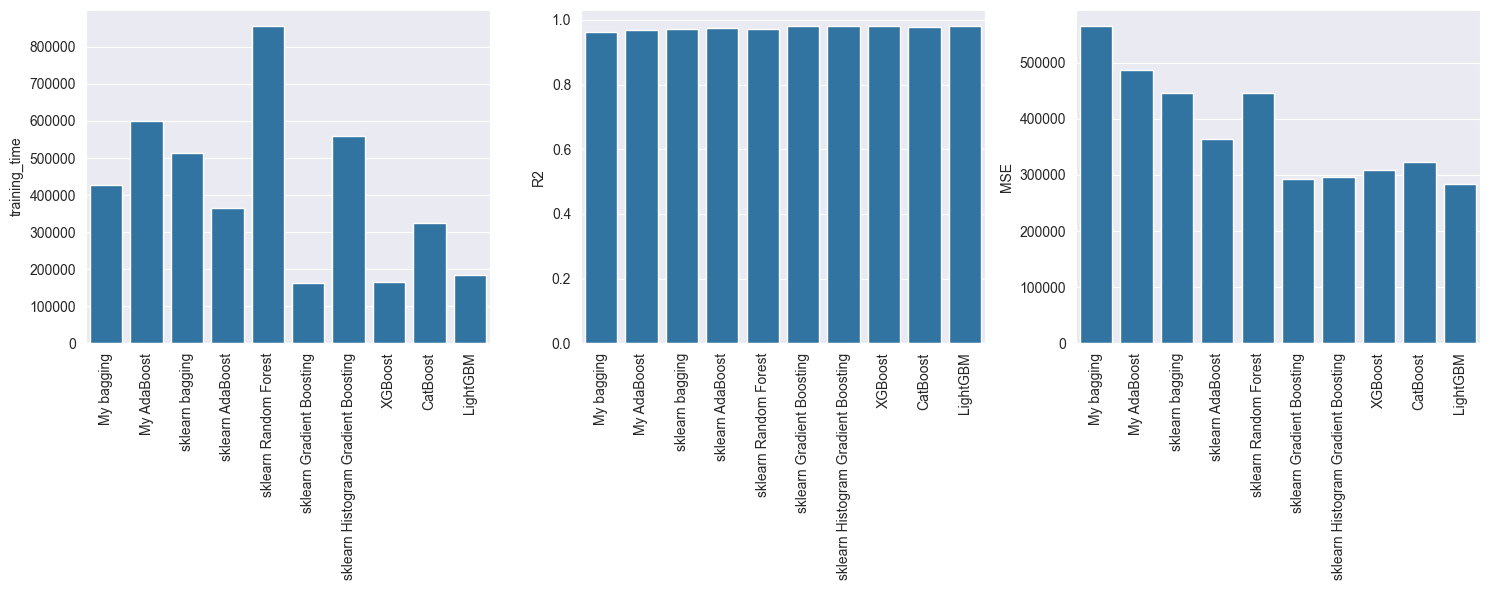

In [78]:
img, axs = plt.subplots(ncols=3, figsize=(15, 6))

for y_axis, ax in zip(["training_time", "R2", "MSE"], axs.flatten()):
    sns.barplot(stats[["ensemble", y_axis]], x="ensemble", y=y_axis, errwidth=1, capsize=0.3, ax=ax)
    ax.tick_params(axis="x", rotation=90)
    ax.set_xlabel(None)

img.tight_layout()

plt.show()

**Выводы**

- LightGBM самый точный, при этом обучается достаточно быстро. Быстрее всех обучился Gradient Boosting из sklearn.
- CatBoost и XGBoost незначительно хуже некоторых алгоритмов из библиотеки sklearn (GradientBoosting,HistGradientBoosting) на этом наборе данных. Если более тщательно подобрать гиперпараметры, их точность должна повыситься.
- не совсем корректно сравнивать время разных ансамблей, так как они обучались с разным количеством estimators, но с другой стороны, мы должны ориентироваться на точность, и если один из ансамблей обучается быстрее, при схожей точности, то это говорит о том, что он лучше подходит для этой задачи.
- Реализованные мной алгоритмы обучаются медленно(в частности из за отсутствия многопоточности)
- Ансамбли GradientBoosting HistogramGradientBoosting, XGBoost, CatBoost и LightGBM показывают на этих данных схожую точность. В таком случае лучше использовать GradientBoosting, XGBoost и LightGBM, так как они обучаются быстрее.